### 과적합 방지 기법
* 데이터의 양을 늘리기
    * 데이터의 양을 늘릴수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합을 방지할 수 있다.
* 모델의 복잡도 줄이기
    * 인공 신경망의 복잡도는 은닉층의 수나 매개변수의 수 등으로 결정된다.
    * 과적합 현상이 포착되었을 때 인공 신경망의 복잡도를 줄이는 것이다.
* 가중치 규제(Regularization) 적용하기
    * 복잡한 모델이 간단한 모델보다 과적합 될 가능성이 높다.
    * 복잡한 모델을 좀 더 간단하게 하는 방법으로 정규화(Ridge, Lasso 정규화)가 있다.
* 드롭아웃(Dropout)
    * 학습 과정에서 신경망의 일부를 사용하지 않는 방법이다.
    * 드롭아웃의 비율을 0.5로 한다면 학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만을 사용한다.
    * 드롭아웃은 신경망 학습시에만 사용하고, 예측시에는 사용하지 않는 것이 일반적이다.
    * 드랍아웃은 학습시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고, 매번 랜덤 선택으로 동일한 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지한다.

11490434/11490434 [==============================] - 1s 0us/step


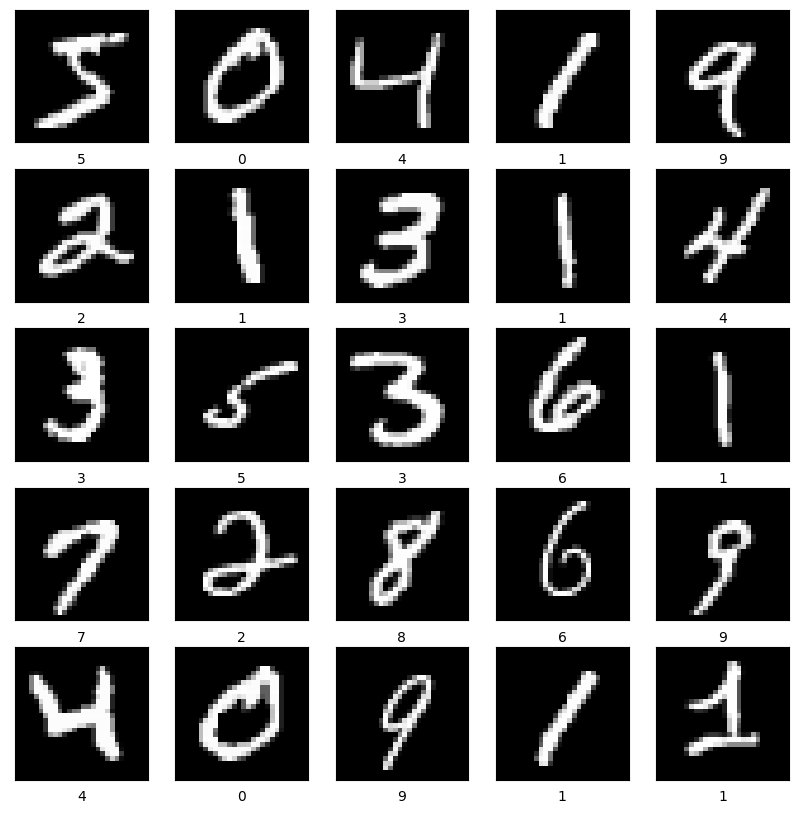

In [1]:
# keras로 Mnist 테스트
from keras.datasets import mnist #손글씨 데이터
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib.pyplot as plt

# mnist 데이터 읽어 들이기
(x_train,y_train),(x_test,y_test) = mnist.load_data()

plt.figure(figsize=(10,10))
for index in range(25):
    plt.subplot(5,5, index +1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[index], cmap='gray')
    plt.xlabel(str(y_train[index]))
plt.show()

In [2]:
# 데이터를 float32 자료형으로 변환하고 정규화하기
x_train = x_train.reshape(60000, 784).astype('float32') # 한장의 이미지 배열이 28행 28열임
x_test = x_test.reshape(10000, 784).astype('float32') #784 = 28 ** 2
x_train /= 255 #minmaxScaler와 같음
x_test /= 255


#레이블 데이터를 0~9까지의 카테고리를 나타내는 배열로 변환하기
y_train = np_utils.to_categorical(y_train, 10) #판다스의 getdummy, sklearn의 onehotEncoding과 같음
y_test = np_utils.to_categorical(y_test, 10)


In [6]:
# 모델 구조 정의하기
model = Sequential()
model.add(Dense(512, input_shape=(784,))) #첫번째 은닉층(노드 512개), input_shape(입력층을 따로 생성하지 않음)
model.add(Activation('relu')) #활성함수는 relu 사용
model.add(Dropout(0.2)) #20% dropout
model.add(Dense(512)) #두번째 은닉층
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10)) #출력층(mnist는 레이블값이 10개임)
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #metrics입력하면 accuracy도 나옴

#데이터 훈련하기
hist = model.fit(x_train,y_train, epochs=5, batch_size=32) #batch_size 한번 학습하는데 사용할 데이터의 크기()

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2138 - accuracy: 0.9347
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1049 - accuracy: 0.9684
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0814 - accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - lo

In [8]:
# 테스트 데이터로 평가하기
score = model.evaluate(x_test, y_test, verbose = 1)
print(score)
print('loss = ', score[0])
print('accuracy =', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0723 - accuracy: 0.9793
[0.072310671210289, 0.9793000221252441]
loss =  0.072310671210289
accuracy = 0.9793000221252441


In [5]:
model.summary()
#401920 = 784 * 512 + 512
#262656 = 512 * 512 + 512
#5130 = 512 * 10 + 10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [30]:
#keras로 비만도 테스트
from symbol import xor_expr
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np

# BMI 데이터를 읽어 들이고 정규화하기
csv = pd.read_csv('../../AI머신러닝데이터/bmi.csv')

#몸무게와 키 데이터
csv['weight'] /= 100
csv['height'] /= 200

x = csv[['weight', 'height']].to_numpy()

#레이블
bclass = {'thin':[1,0,0], 'normal':[0,1,0], 'fat':[0,0,1]}
y = np.empty((20000,3))
for i,v in enumerate(csv['label']):
    y[i] = bclass[v]
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
from sklearn.model_selection import train_test_split

# x_train, y_train = x[1:15001],y[1:15001]
# x_test, y_test = x[15001:20001],y[15001:20001]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)



In [31]:
# 모델 구조 정의하기
model = Sequential()
model.add(Dense(512, input_shape=(2,))) #input_shape(2,) 는 각각 height와 weight임
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(3))
model.add(Activation('softmax'))

# 모델 구축하기
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [32]:
#데이터 훈련하기
hist = model.fit(x_train,y_train, batch_size=100, epochs=20)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
140/140 [==============================] - 2s 5ms/step - loss: 0.4422 - accuracy: 0.8441
Epoch 2/20
140/140 [==============================] - 1s 5ms/step - loss: 0.1418 - accuracy: 0.9567
Epoch 3/20
140/140 [==============================] - 1s 5ms/step - loss: 0.1000 - accuracy: 0.9666
Epoch 4/20
140/140 [==============================] - 1s 5ms/step - loss: 0.08

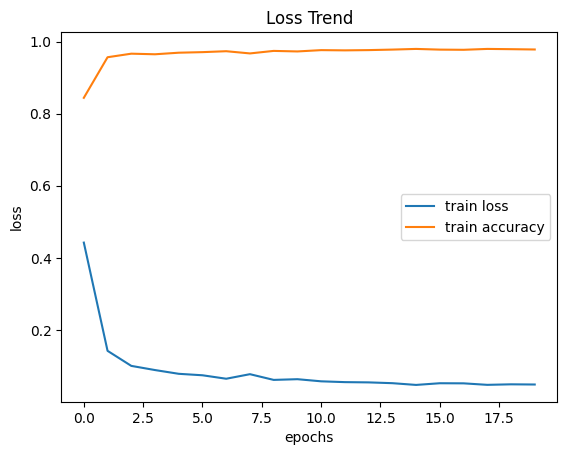

In [33]:
import matplotlib.pyplot as plt
plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.legend(loc='best')
plt.show()

In [34]:
score = model.evaluate(x_test,y_test)
print(score)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
188/188 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9900
[0.03252754732966423, 0.9900000095367432]


In [35]:
# tensorflow를 이용한 keras

import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
model = tf.keras.Sequential(layers=[tf.keras.layers.Flatten(input_shape=(28,28)), #입력층 설계
                                    tf.keras.layers.Dense(128, activation='relu'), #은닉층
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')]) #출력층
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dropout_14 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3939 - accuracy: 0.9054
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3631 - accuracy: 0.9072
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3536 - accuracy: 0.9125
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 

In [46]:
#케라스 모델의 정확도는 evalute 메서드를 이용해서 확인
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3034 - accuracy: 0.9434 - 330ms/epoch - 1ms/step
테스트 정확도: 0.9434000253677368


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 892us/step
예측값:7,실제값:7


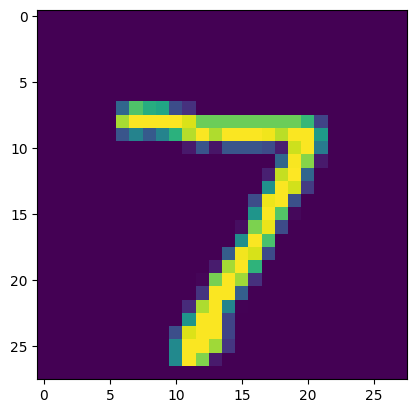

In [47]:
import matplotlib.pyplot as plt
import numpy as np

predictions = model.predict(x_test)
pred = np.argmax(predictions[0]) #가장 큰 값을 보여줌
print('예측값:{},실제값:{}'.format(pred, y_test[0]))
plt.imshow(x_test[0])
plt.show()

In [48]:
#history 객체는 모델이 매 epochs 마다 측정한 비용(loss)과 정확도를 기록한다.
history.history

{'loss': [0.39393115043640137,
  0.36313730478286743,
  0.353559285402298,
  0.3465903401374817,
  0.33638471364974976],
 'accuracy': [0.9054499864578247,
  0.9072166681289673,
  0.9124500155448914,
  0.914816677570343,
  0.916700005531311]}

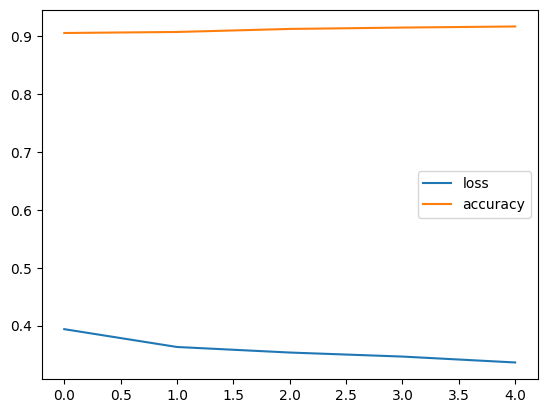

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss','accuracy'])
plt.show()

In [80]:
# tf.keras 기본 이미지 분류 예제
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#패션 mnist 데이터셋 임포트
fashion_mnist = keras.datasets.fashion_mnist

#train_images와 train_labels 배열은 모델 학습에 사용되는 훈련 세트
#test_images와 test_labels 배열은 모델 테스트에 사용되는 테스트 세트
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

#이미지는 28*28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이다. 레이블은 0에서 9까지의 정수 배열이며
#이미지에 있는 옷은 클래스(class)를 나타낸다.
#레이블클래스는 다음과 같다.
#0 : T-shirt/top 1 : Trouser 2 : Pullover 3 : Dress 4 : Coat 5 : Sandal 6 : Shirt 7 : Sneaker 8 : Bag 
#9 : Ankle boot

class_names =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 
'Ankle boot']

#데이터셋 구조: 훈련 세트에 60000개의 이미지, 각 이미지는 28*28 픽셀로 표현
train_images.shape


(60000, 28, 28)

In [53]:
print(len(train_labels))
print(train_labels)
print(len(test_labels))
print(test_images.shape)

60000
[9 0 0 ... 3 0 5]
10000
(10000, 28, 28)


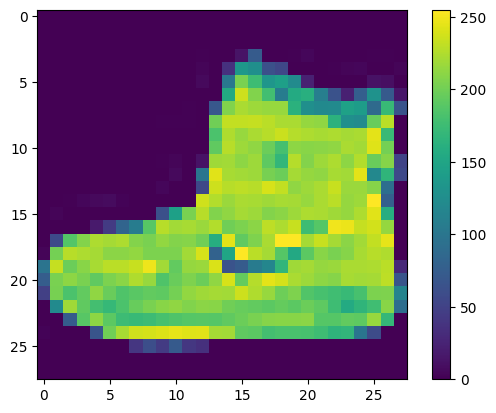

In [54]:
#데이터 전처리: 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 확인
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [81]:
# 신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정
train_images = train_images / 255.0
test_images = test_images / 255.0

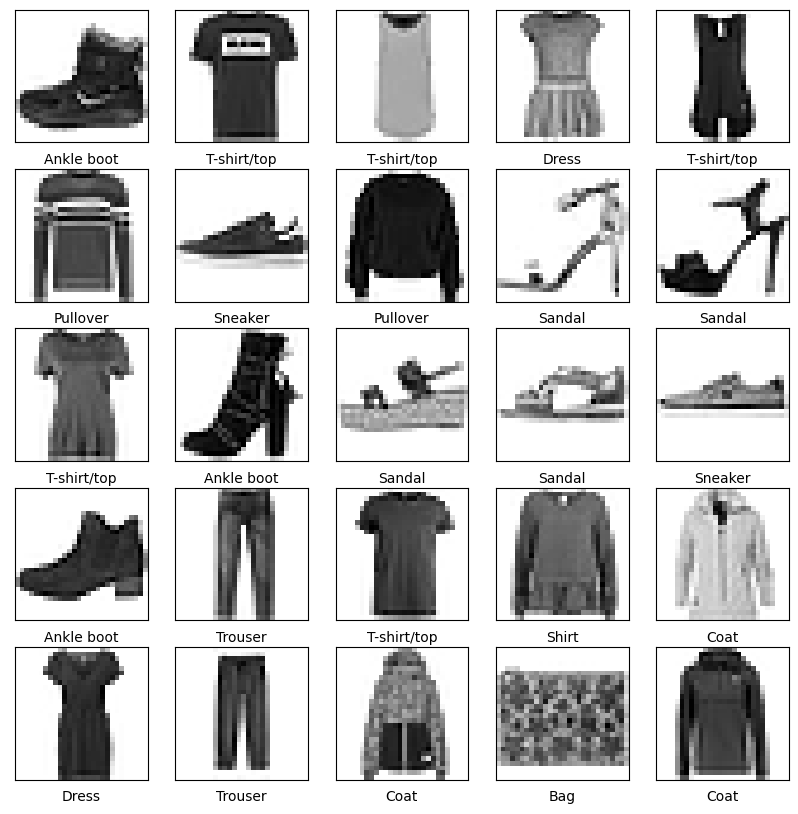

In [56]:
#훈련 세트에서 처음 25개의 이미지와 그 아래 클래스 이름을 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [83]:
#로그 파일 생성
import datetime
log_dir = 'logs\\fit\\' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

#로그 기록 함수
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#모델 구성
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#모델 훈련
history = model.fit(train_images, train_labels, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4952 - accuracy: 0.8269
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3733 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3349 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 

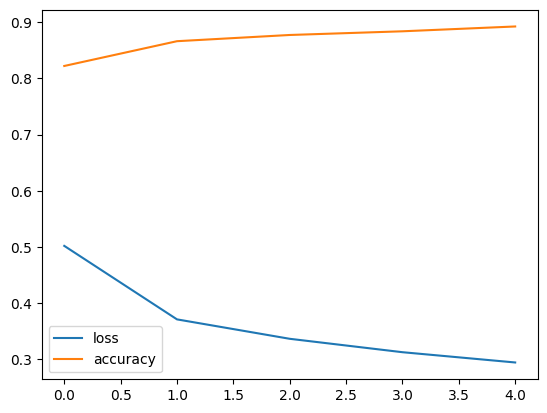

In [79]:
# 손실과 정확도 그래프로 확인
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(['loss', 'accuracy'])
plt.show()

In [63]:
#정확도 평가
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('정확도 테스트:',test_acc)

#예측 만들기
predictions = model.predict(test_images)

313/313 - 0s - loss: 0.3552 - accuracy: 0.8775 - 263ms/epoch - 840us/step
정확도 테스트: 0.8774999976158142
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 0s 884us/step


In [64]:
#첫 번째 예측 확인
#이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도를 나타낸다.
print(predictions[0])

#가장 높은 신뢰도를 가진 레이블
print(np.argmax(predictions[0]))

print(test_labels[0])



[2.3136593e-06 4.9528728e-09 2.6686851e-06 7.3572505e-07 2.0683294e-06
 1.0204022e-03 4.7373524e-06 2.1074915e-02 3.5403913e-04 9.7753817e-01]
9
9


In [73]:
# 10개 클래스에 대한 예측을 모두 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label], 100*np.max(predictions_array),
                                         class_names[true_label], color = color))
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

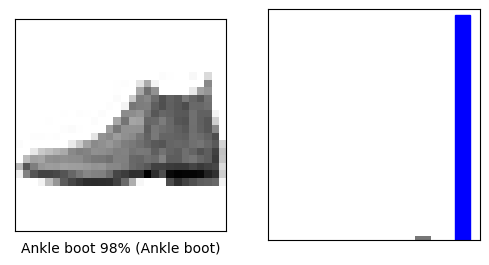

In [74]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

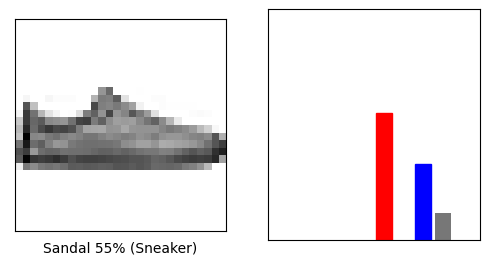

In [75]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

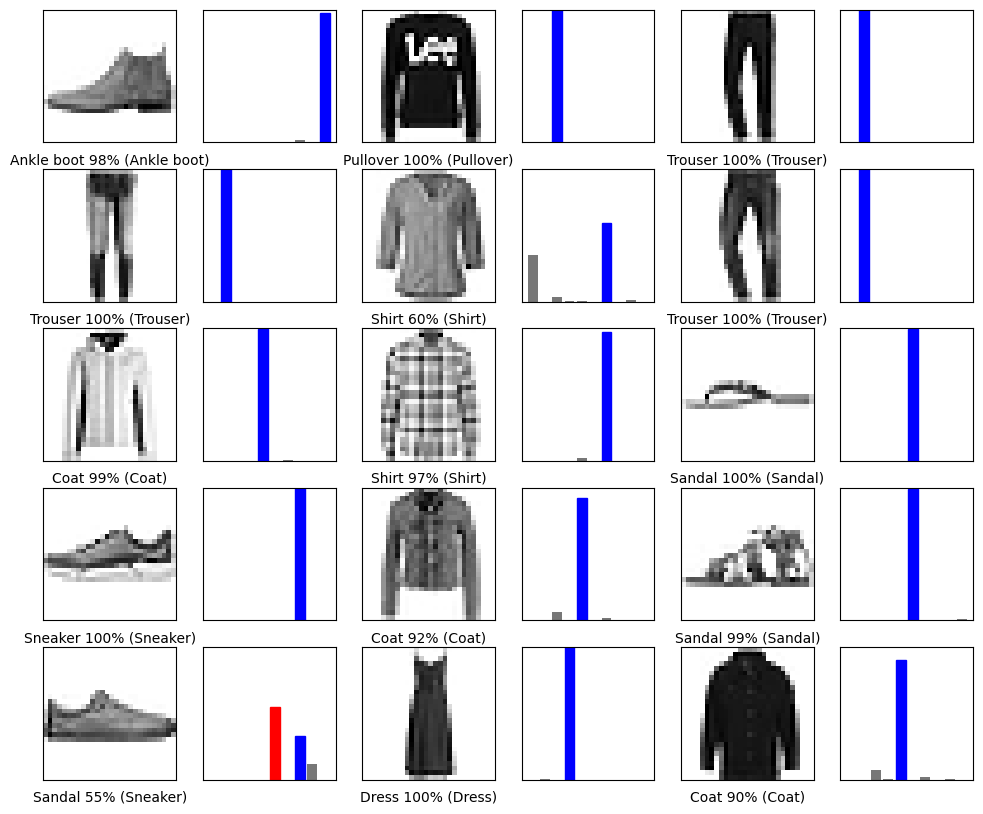

In [76]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()


### 영화 리뷰를 사용한 텍스트 분류
* 총 50000건의 영화리뷰 텍스트를 담은 IMDB 데이터셋
* 훈련용 25000개, 테스트용 25000개로 구성되어 있으며 긍정적리뷰는 1, 부정적리뷰는 0

In [76]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [77]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [78]:
print(len(train_data))
print(len(train_labels))
print(len(test_data))
print(len(test_labels))

25000
25000
25000
25000


In [79]:
print(len(train_data[0])) #각 리뷰에 대한 길이를 가장 긴 리뷰를 기준으로 다른 짧은 리뷰를 맞춤
print(len(train_data[1]))
print(len(train_data[2]))

218
189
141


In [80]:
word_index = imdb.get_word_index()

In [81]:
word_index = {k:(v+3) for k,v in word_index.items()} #v에 3을 더한이유는 0,1,2,3 인덱스를 비워놓기 위함
word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [82]:
word_index['<PAD>'] = 0 #비워둔 인덱스에 이 값들을 채워넣음(0번 인덱스는 원래 없어서 4개 넣기가 가능)
word_index['<START>'] = 1
word_index['<UNK>'] = 2 #unknown
word_index['<UNUSED>'] = 3

In [83]:
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
reverse_word_index #인덱스가 먼저 나오고 키가 뒤에 나옴

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [84]:
def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text]) #i에 들어갈 숫자(문자)가 없으면 ?로 처리함

In [85]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

#### pad_sequences
##### pad_sequences(sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre', value=0.0)
* 문장의 길이를 maxlen 인자로 맞추어 준다. 120으로 지정했다면 120보다 짧은 문장은 0으로 채워서 120단어로 맞춰주고 120단어보다 긴 문장은 120단어까지만 잘라낸다.
* (num_samples, num_timesteps)으로 2차원의 numpy 배열로 만들어준다. maxlen을 120으로 지정했다면, num_timesteps도 120이 된다.
* 인수
    * padding: 'pre' or 'post' (앞쪽, 뒷쪽)
    * truncating: 'pre' or 'post'
    * value : 채워질 값. default는 0

In [86]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index['<PAD>'],
                                                        padding='post',
                                                        maxlen=256)

In [87]:
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                        value=word_index['<PAD>'],
                                                        padding='post',
                                                        maxlen=256)

In [88]:
test_data[0]

array([   1,  591,  202,   14,   31,    6,  717,   10,   10,    2,    2,
          5,    4,  360,    7,    4,  177, 5760,  394,  354,    4,  123,
          9, 1035, 1035, 1035,   10,   10,   13,   92,  124,   89,  488,
       7944,  100,   28, 1668,   14,   31,   23,   27, 7479,   29,  220,
        468,    8,  124,   14,  286,  170,    8,  157,   46,    5,   27,
        239,   16,  179,    2,   38,   32,   25, 7944,  451,  202,   14,
          6,  717,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [97]:
vocab_size = 10000

model = keras.Sequential()
# sequence 차원에 대해 평균을 계산하여 각 샘플에 대해 고정된 길이(여기에선 16)의 출력 벡터 반환
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None, ))) #10000개의 단어벡터를 16개로 줄임
model.add(keras.layers.GlobalAveragePooling1D()) #평균값을 가지고 데이터를 처리함
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='tanh'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 16)          160000    
                                                                 
 global_average_pooling1d_4   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [99]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [106]:
#validation_data 검증 데이터
import datetime
from gc import callbacks
log_dir = 'logs\\fit\\' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(partial_x_train, partial_y_train, epochs=40, batch_size=512,
                    validation_data=(x_val, y_val), verbose=1,callbacks=[tensorboard_callback]
                    )

Epoch 1/40
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
29/30 [============================>.] - ETA: 0s - loss: 2.6348 - accuracy: 0.5040WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F11E515C18> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

In [93]:
result = model.evaluate(test_data, test_labels, verbose=2)
print('loss = ', result[0])
print('accuracy =',result[1])

782/782 - 1s - loss: 0.3988 - accuracy: 0.8768 - 637ms/epoch - 814us/step
loss =  0.39884909987449646
accuracy = 0.8767600059509277


In [94]:
history_dict = history.history

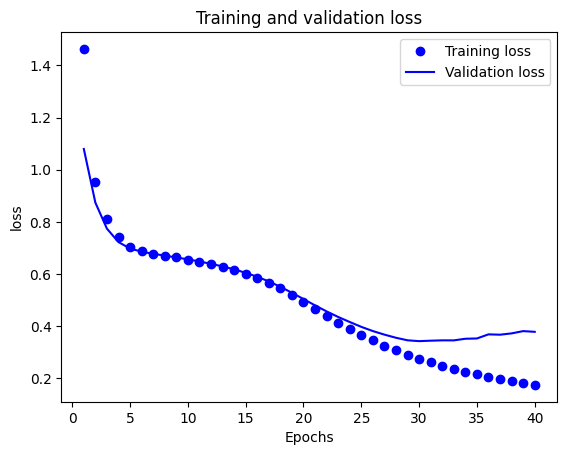

In [95]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

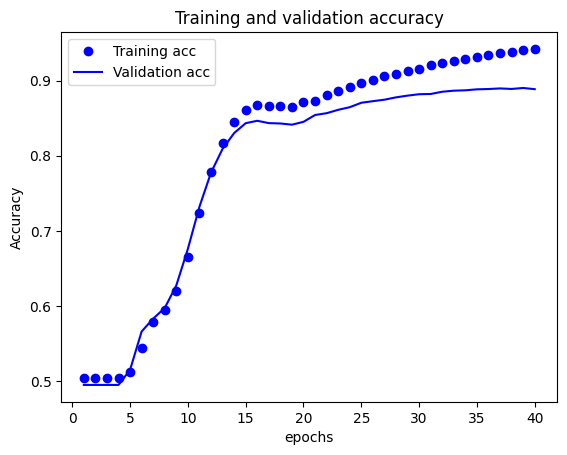

In [96]:
plt.clf()

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()